# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 깨짐 문제 해결용
from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False
path = "C:\Windows\Fonts\H2GTRM.TTF"
font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

# 1. Data

In [3]:
df = pd.read_csv("data/processed/labeled_data_1.csv")

In [4]:
df.head()

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 00:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,...,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,24.799999,27.5
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 00:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.60,...,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 00:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.60,...,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 00:00:00,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.59,...,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 00:00:00,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,...,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   _id                       5232 non-null   object 
 1   TimeStamp                 5232 non-null   object 
 2   PART_FACT_PLAN_DATE       5232 non-null   object 
 3   PART_FACT_SERIAL          5232 non-null   int64  
 4   PART_NAME                 5232 non-null   object 
 5   EQUIP_CD                  5232 non-null   object 
 6   EQUIP_NAME                5232 non-null   object 
 7   PassOrFail                5232 non-null   int64  
 8   Reason                    5232 non-null   object 
 9   Injection_Time            5232 non-null   float64
 10  Filling_Time              5232 non-null   float64
 11  Plasticizing_Time         5232 non-null   float64
 12  Cycle_Time                5232 non-null   float64
 13  Clamp_Close_Time          5232 non-null   float64
 14  Cushion_

In [6]:
df.nunique()

_id                         5232
TimeStamp                   2625
PART_FACT_PLAN_DATE           13
PART_FACT_SERIAL              17
PART_NAME                      6
EQUIP_CD                       3
EQUIP_NAME                     3
PassOrFail                     2
Reason                         4
Injection_Time                36
Filling_Time                  35
Plasticizing_Time            121
Cycle_Time                    48
Clamp_Close_Time              13
Cushion_Position              22
Switch_Over_Position           3
Plasticizing_Position         49
Clamp_Open_Position            5
Max_Injection_Speed           55
Max_Screw_RPM                 11
Average_Screw_RPM             16
Max_Injection_Pressure        35
Max_Switch_Over_Pressure      69
Max_Back_Pressure             68
Average_Back_Pressure         53
Barrel_Temperature_1          67
Barrel_Temperature_2          60
Barrel_Temperature_3          45
Barrel_Temperature_4          79
Barrel_Temperature_5          56
Barrel_Tem

In [7]:
# "TimeStamp", "PART_FACT_PLAN_DATE" column을 datetime으로 변환

df["TimeStamp"] = pd.to_datetime(df["TimeStamp"])
df["PART_FACT_PLAN_DATE"] = pd.to_datetime(df["PART_FACT_PLAN_DATE"])

In [8]:
df.set_index("TimeStamp", inplace=True)

In [9]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,...,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-16 04:57:47,5f8928bb9c0189cc666ef19b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,4.47,...,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,24.799999,27.5
2020-10-16 04:58:48,5f8928de9c0189cc666ef20b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.60,4.48,...,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
2020-10-16 04:58:48,5f8928df9c0189cc666ef213,2020-10-16,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.60,4.48,...,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.6
2020-10-16 04:59:48,5f8928f39c0189cc666ef25e,2020-10-16,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,None,9.59,4.48,...,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6
2020-10-16 04:59:48,5f8928f59c0189cc666ef265,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,None,9.59,4.48,...,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.6


# 2. 1차 EDA

In [10]:
df.columns

Index(['_id', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME',
       'EQUIP_CD', 'EQUIP_NAME', 'PassOrFail', 'Reason', 'Injection_Time',
       'Filling_Time', 'Plasticizing_Time', 'Cycle_Time', 'Clamp_Close_Time',
       'Cushion_Position', 'Switch_Over_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_3', 'Mold_Temperature_4'],
      dtype='object')

In [11]:
numeric_columns = [
    'PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 
    'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position', 
    'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed', 
    'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
    'Max_Switch_Over_Pressure', 'Max_Back_Pressure', 'Average_Back_Pressure', 
    'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 
    'Barrel_Temperature_4', 'Barrel_Temperature_5', 'Barrel_Temperature_6', 
    'Barrel_Temperature_7', 'Hopper_Temperature', 'Mold_Temperature_3', 
    'Mold_Temperature_4'
]

categorical_columns = [
    'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 
    'EQUIP_NAME', 'Reason', 
]

In [12]:
df[categorical_columns] = df[categorical_columns].astype("category")

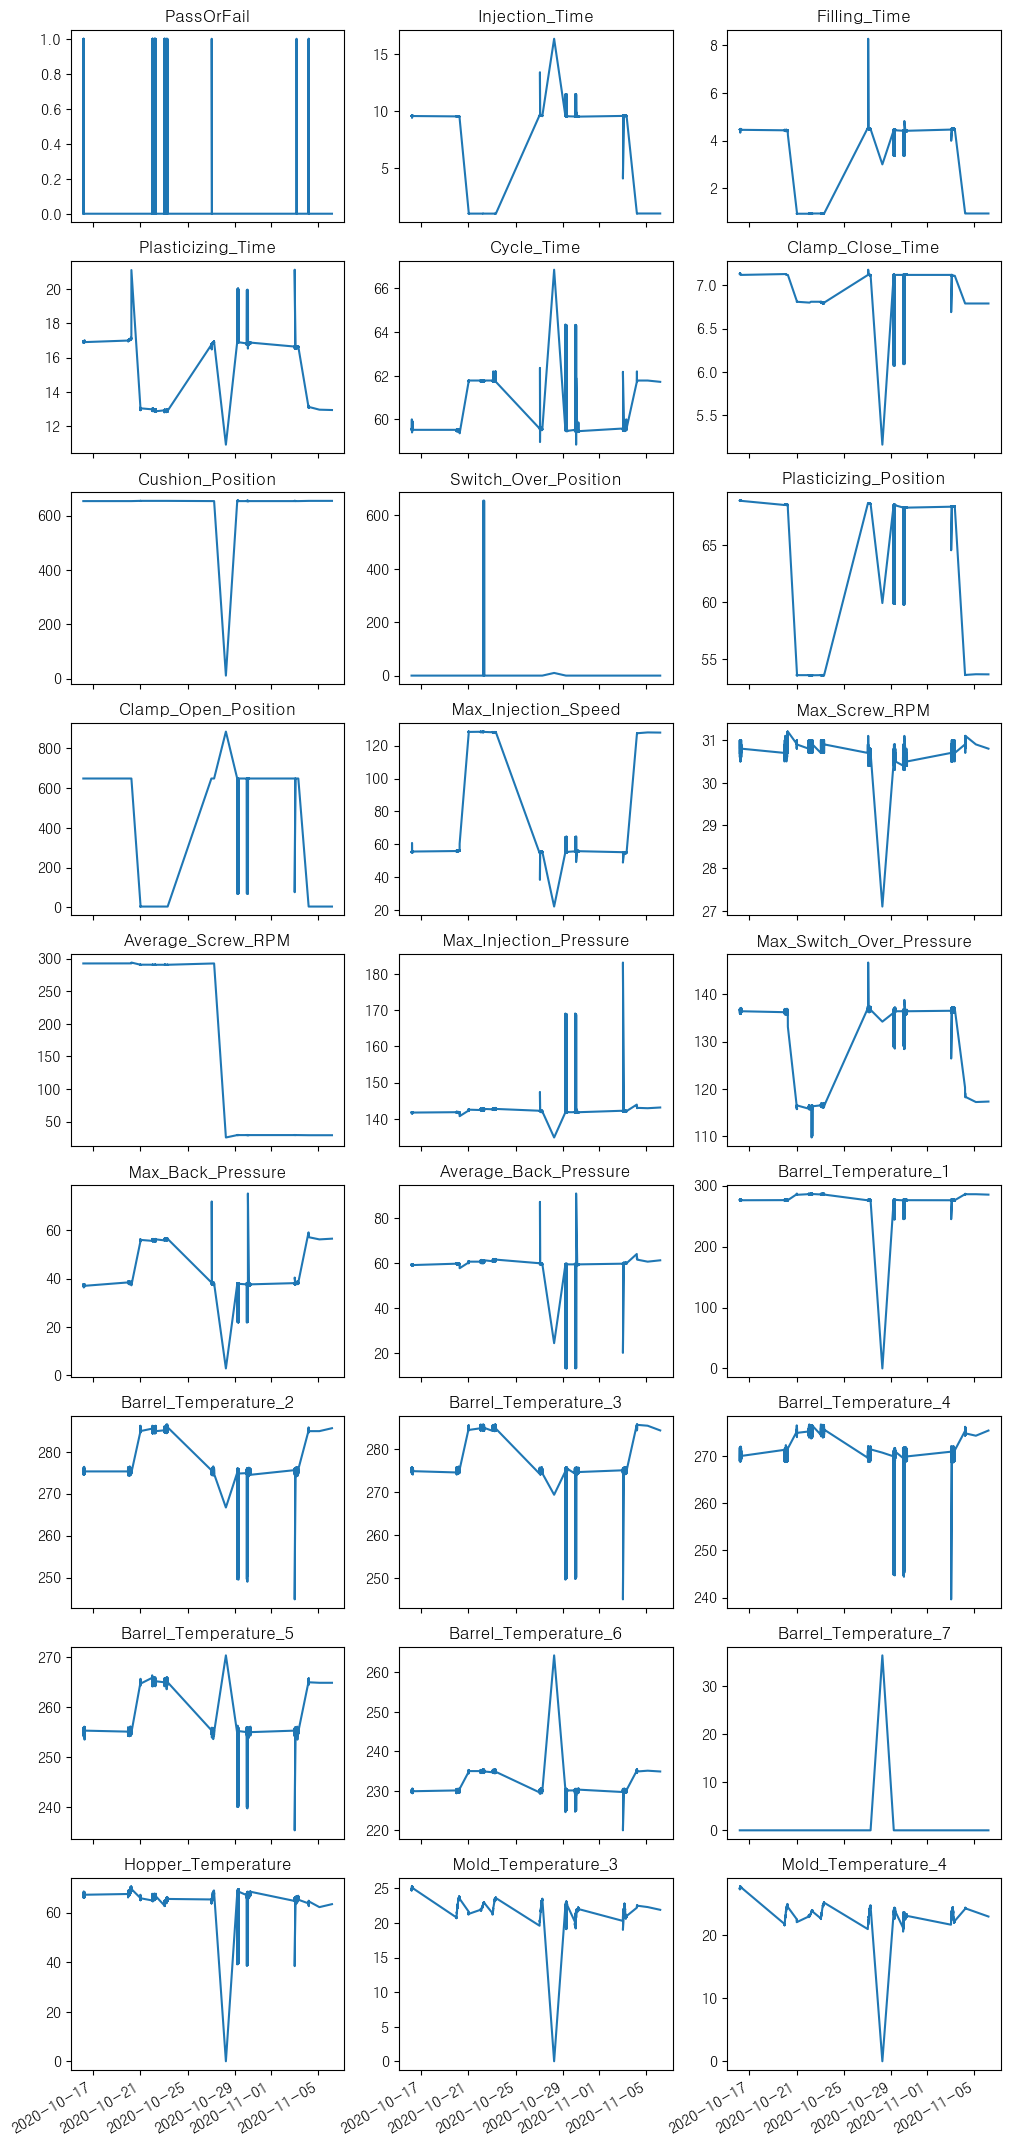

In [13]:
fig, axs = plt.subplots(
    figsize=(12, 30),
    nrows=9, ncols=3,
    sharex=True
)
r = 0
c = 0
for col in numeric_columns:
    axs[r, c].plot(df[f"{col}"])
    axs[r, c].set_title(f"{col}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
fig.autofmt_xdate()
plt.show();

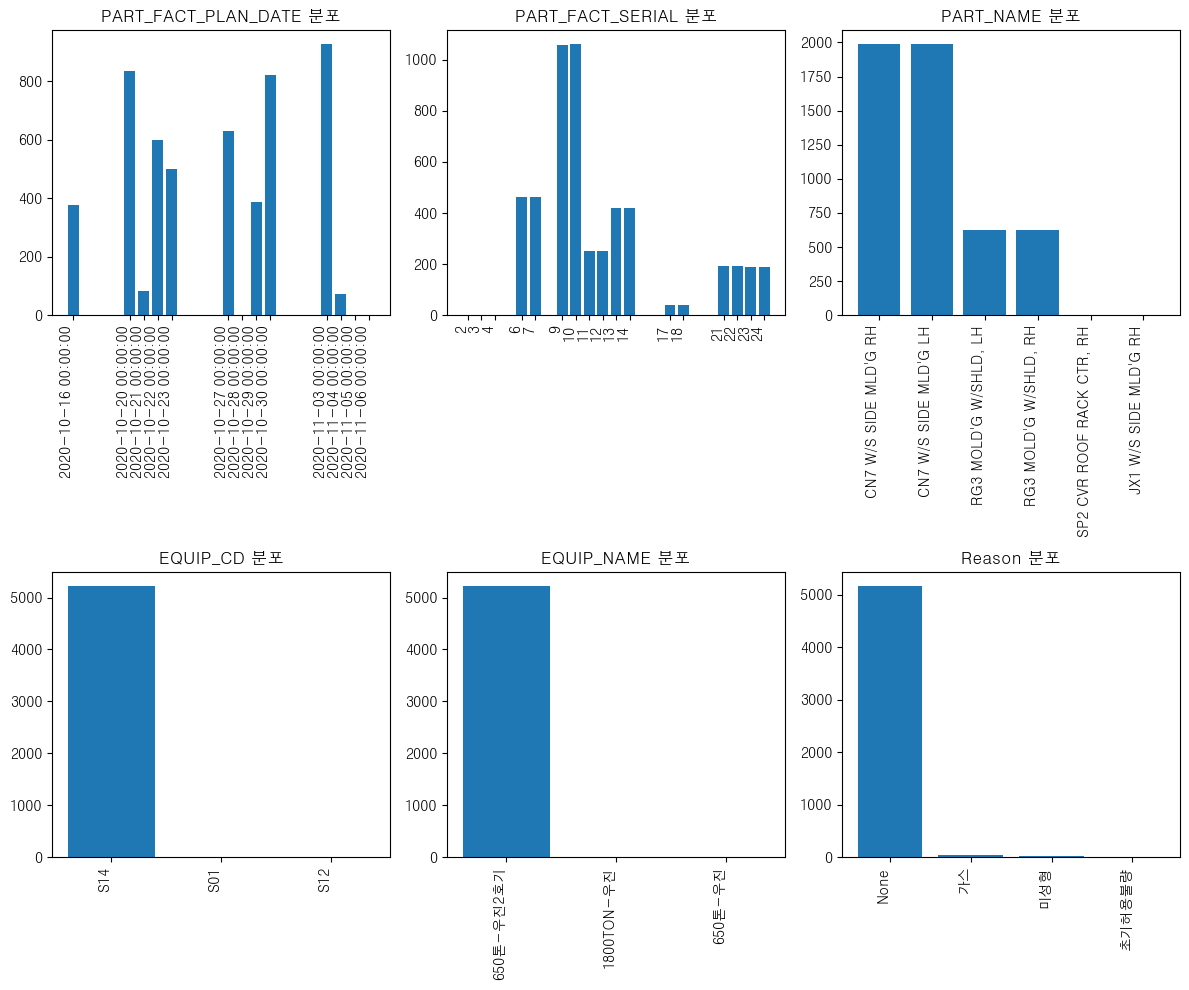

In [14]:
fig, axs = plt.subplots(
    figsize=(12, 10),
    nrows=2, ncols=3,
)
r = 0
c = 0
for col in categorical_columns:
    temp = df.groupby(f"{col}", observed=True).size()
    axs[r, c].bar(temp.index, temp.values)
    axs[r, c].set_title(f"{col} 분포")
    axs[r, c].set_xticks(temp.index)
    axs[r, c].set_xticklabels(temp.index, rotation=90, ha="right")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0

plt.tight_layout()
plt.show();

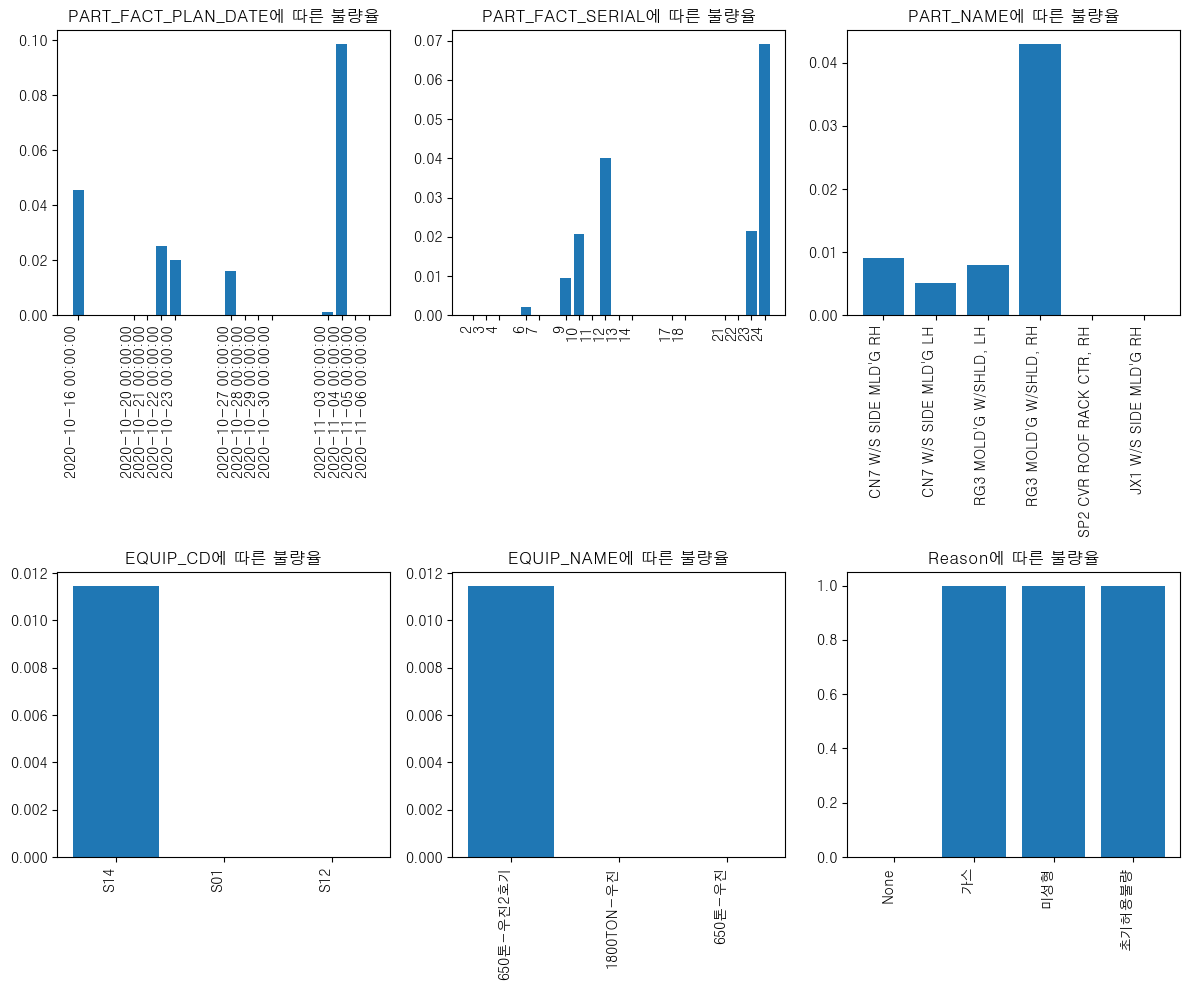

In [15]:
fig, axs = plt.subplots(
    figsize=(12, 10),
    nrows=2, ncols=3,
)
r = 0
c = 0
for col in categorical_columns:
    temp_df = df.groupby(f"{col}", observed=True)[["PassOrFail"]].mean()
    axs[r, c].bar(temp_df.index, temp_df["PassOrFail"])
    axs[r, c].set_title(f"{col}에 따른 불량율")
    axs[r, c].set_xticks(temp_df.index)
    axs[r, c].set_xticklabels(temp_df.index, rotation=90, ha="right")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0

plt.tight_layout()
plt.show();

In [16]:
df["EQUIP_NAME"].value_counts()

650톤-우진2호기    5230
1800TON-우진       1
650톤-우진          1
Name: EQUIP_NAME, dtype: int64

In [17]:
df["EQUIP_CD"].value_counts()

S14    5230
S01       1
S12       1
Name: EQUIP_CD, dtype: int64

## 1차 EDA 결론

- 사출기 중 650톤-우진2호기만 사용 : 나머지 2기는 N수가 너무 적음
- "EQUIP_NAME"과 "EQUIP_CD"는 변수에서 제외

In [18]:
df = df.query("EQUIP_NAME == '650톤-우진2호기'")
df = df.drop(columns=["EQUIP_NAME", "EQUIP_CD"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5230 entries, 2020-10-16 04:57:47 to 2020-11-06 04:27:38
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   _id                       5230 non-null   object  
 1   PART_FACT_PLAN_DATE       5230 non-null   category
 2   PART_FACT_SERIAL          5230 non-null   category
 3   PART_NAME                 5230 non-null   category
 4   PassOrFail                5230 non-null   int64   
 5   Reason                    5230 non-null   category
 6   Injection_Time            5230 non-null   float64 
 7   Filling_Time              5230 non-null   float64 
 8   Plasticizing_Time         5230 non-null   float64 
 9   Cycle_Time                5230 non-null   float64 
 10  Clamp_Close_Time          5230 non-null   float64 
 11  Cushion_Position          5230 non-null   float64 
 12  Switch_Over_Position      5230 non-null   float64 
 13  Plasticizing

In [20]:
df.nunique()

_id                         5230
PART_FACT_PLAN_DATE           12
PART_FACT_SERIAL              16
PART_NAME                      4
PassOrFail                     2
Reason                         4
Injection_Time                34
Filling_Time                  33
Plasticizing_Time            119
Cycle_Time                    46
Clamp_Close_Time              11
Cushion_Position              20
Switch_Over_Position           2
Plasticizing_Position         47
Clamp_Open_Position            3
Max_Injection_Speed           53
Max_Screw_RPM                 10
Average_Screw_RPM             15
Max_Injection_Pressure        33
Max_Switch_Over_Pressure      67
Max_Back_Pressure             66
Average_Back_Pressure         51
Barrel_Temperature_1          66
Barrel_Temperature_2          58
Barrel_Temperature_3          43
Barrel_Temperature_4          78
Barrel_Temperature_5          54
Barrel_Temperature_6          35
Barrel_Temperature_7           1
Hopper_Temperature            92
Mold_Tempe

In [21]:
# nunique가 1개인 Barrel_Temperature_7은 Feature에서 제외함

df = df.drop(columns=["Barrel_Temperature_7"])

# 3. 2차 EDA

In [22]:
df.columns

Index(['_id', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME',
       'PassOrFail', 'Reason', 'Injection_Time', 'Filling_Time',
       'Plasticizing_Time', 'Cycle_Time', 'Clamp_Close_Time',
       'Cushion_Position', 'Switch_Over_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [23]:
numeric_columns = [
    'PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 
    'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position', 
    'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed', 
    'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
    'Max_Switch_Over_Pressure', 'Max_Back_Pressure', 'Average_Back_Pressure', 
    'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 
    'Barrel_Temperature_4', 'Barrel_Temperature_5', 'Barrel_Temperature_6', 
    'Hopper_Temperature', 'Mold_Temperature_3', 'Mold_Temperature_4'
]

categorical_columns = [
    'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME', 'Reason',
]

In [24]:
df[categorical_columns] = df[categorical_columns].astype("str")    # To reset the categories
df[categorical_columns] = df[categorical_columns].astype("category")

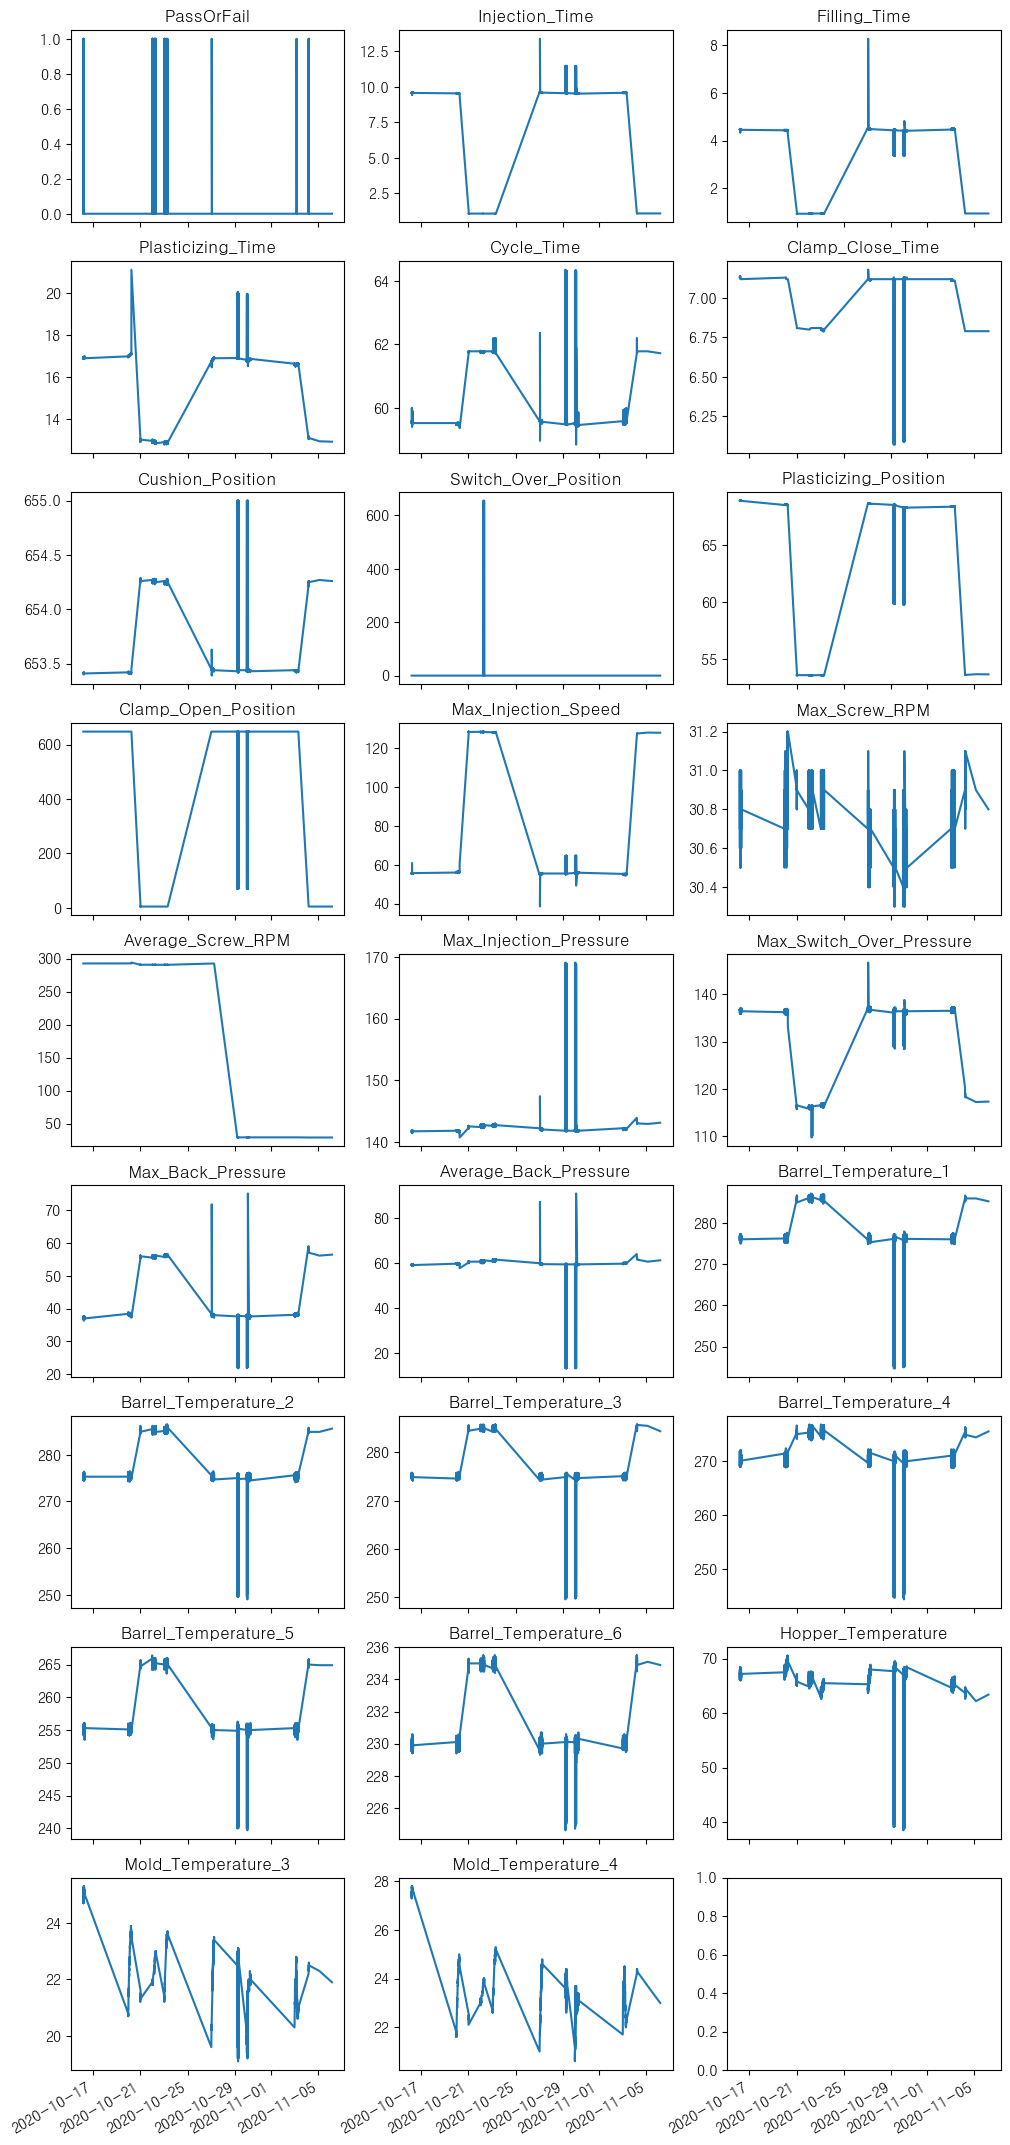

In [25]:
fig, axs = plt.subplots(
    figsize=(12, 30),
    nrows=9, ncols=3,
    sharex=True
)
r = 0
c = 0
for col in numeric_columns:
    axs[r, c].plot(df[f"{col}"])
    axs[r, c].set_title(f"{col}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
fig.autofmt_xdate()
plt.show();

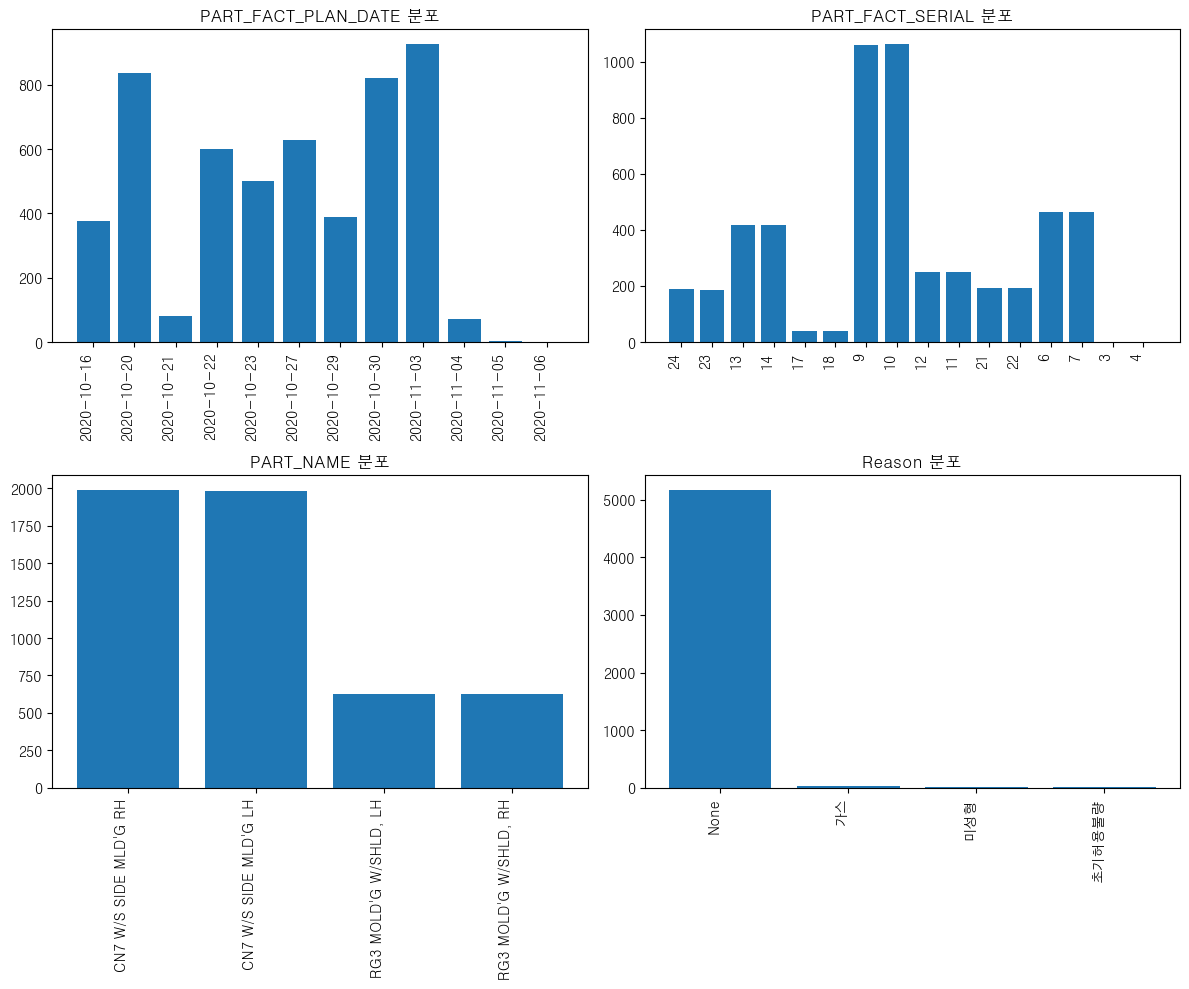

In [26]:
fig, axs = plt.subplots(
    figsize=(12, 10),
    nrows=2, ncols=2,
)
r = 0
c = 0
for col in categorical_columns:
    temp = df.groupby(f"{col}", observed=True).size()
    axs[r, c].bar(temp.index, temp.values)
    axs[r, c].set_title(f"{col} 분포")
    axs[r, c].set_xticks(temp.index)
    axs[r, c].set_xticklabels(temp.index, rotation=90, ha="right")
    if c < 1:
        c += 1
    else:
        r += 1
        c = 0

plt.tight_layout()
plt.show();

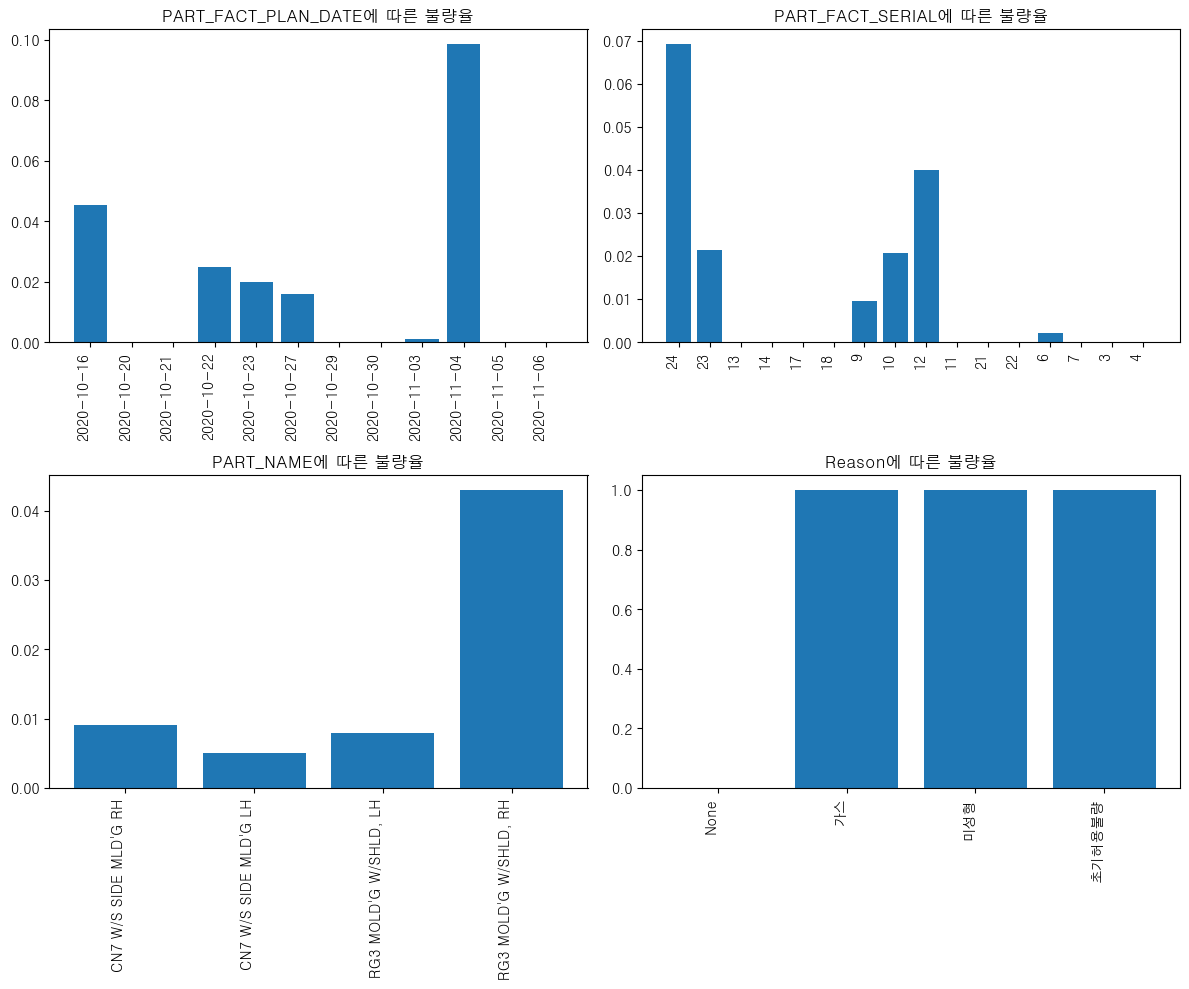

In [27]:
fig, axs = plt.subplots(
    figsize=(12, 10),
    nrows=2, ncols=2,
)
r = 0
c = 0
for col in categorical_columns:
    temp_df = df.groupby(f"{col}", observed=True)[["PassOrFail"]].mean()
    axs[r, c].bar(temp_df.index, temp_df["PassOrFail"])
    axs[r, c].set_title(f"{col}에 따른 불량율")
    axs[r, c].set_xticks(temp_df.index)
    axs[r, c].set_xticklabels(temp_df.index, rotation=90, ha="right")
    if c < 1:
        c += 1
    else:
        r += 1
        c = 0

plt.tight_layout()
plt.show();

## 제품별 공정 조건 차이 비교

In [28]:
df.head()

,_id,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2020-10-16 04:57:47,5f8928bb9c0189cc666ef19b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.47,16.92,59.520000,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
2020-10-16 04:58:48,5f8928de9c0189cc666ef20b,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:58:48,5f8928df9c0189cc666ef213,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.60,4.48,16.91,59.580002,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2020-10-16 04:59:48,5f8928f39c0189cc666ef25e,2020-10-16,23,CN7 W/S SIDE MLD'G LH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
2020-10-16 04:59:48,5f8928f59c0189cc666ef265,2020-10-16,24,CN7 W/S SIDE MLD'G RH,0,None,9.59,4.48,16.91,59.560001,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6


In [29]:
numeric_features = [
    'Injection_Time', 'Filling_Time', 'Plasticizing_Time', 
    'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position', 'Switch_Over_Position', 
    'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed', 
    'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
    'Max_Switch_Over_Pressure', 'Max_Back_Pressure', 'Average_Back_Pressure', 
    'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 
    'Barrel_Temperature_4', 'Barrel_Temperature_5', 'Barrel_Temperature_6', 
    'Hopper_Temperature', 'Mold_Temperature_3', 'Mold_Temperature_4'
]

In [30]:
for feat in numeric_features:
    print(f"Statistics of {feat}")
    display(df.groupby("PART_NAME")[f"{feat}"].describe())
    print("-------------------------------------------------------------------------")
    print("\n")

Statistics of Injection_Time


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,9.574267,0.161502,9.36,9.53,9.57,9.59,13.39
CN7 W/S SIDE MLD'G RH,1989.0,9.576149,0.172119,9.36,9.53,9.57,9.59,13.39
"RG3 MOLD'G W/SHLD, LH",628.0,1.060796,0.003436,1.05,1.06,1.06,1.06,1.08
"RG3 MOLD'G W/SHLD, RH",628.0,1.060812,0.003501,1.05,1.06,1.06,1.06,1.08


-------------------------------------------------------------------------


Statistics of Filling_Time


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,4.446635,0.127404,3.35,4.42,4.45,4.48,8.27
CN7 W/S SIDE MLD'G RH,1989.0,4.445530,0.131861,3.35,4.42,4.45,4.48,8.27
"RG3 MOLD'G W/SHLD, LH",628.0,0.936545,0.005591,0.93,0.93,0.94,0.94,0.95
"RG3 MOLD'G W/SHLD, RH",628.0,0.936576,0.005667,0.93,0.93,0.94,0.94,0.96


-------------------------------------------------------------------------


Statistics of Plasticizing_Time


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,16.848962,0.279297,16.469999,16.75,16.85,16.940001,21.10
CN7 W/S SIDE MLD'G RH,1989.0,16.851900,0.293650,16.469999,16.75,16.85,16.940001,21.10
"RG3 MOLD'G W/SHLD, LH",628.0,12.933535,0.064780,12.800000,12.89,12.92,12.960000,13.19
"RG3 MOLD'G W/SHLD, RH",628.0,12.933790,0.065119,12.800000,12.89,12.92,12.960000,13.19


-------------------------------------------------------------------------


Statistics of Cycle_Time


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,59.540298,0.326319,58.840000,59.480000,59.520000,59.520000,64.349998
CN7 W/S SIDE MLD'G RH,1989.0,59.545073,0.359759,58.840000,59.480000,59.520000,59.520000,64.349998
"RG3 MOLD'G W/SHLD, LH",628.0,61.771783,0.040254,61.720001,61.759998,61.779999,61.779999,62.200001
"RG3 MOLD'G W/SHLD, RH",628.0,61.771767,0.040277,61.709999,61.759998,61.779999,61.779999,62.200001


-------------------------------------------------------------------------


Statistics of Clamp_Close_Time


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,7.115854,0.066080,6.07,7.12,7.12,7.12,7.18
CN7 W/S SIDE MLD'G RH,1989.0,7.114827,0.073662,6.07,7.12,7.12,7.12,7.18
"RG3 MOLD'G W/SHLD, LH",628.0,6.801975,0.007466,6.79,6.80,6.80,6.81,6.81
"RG3 MOLD'G W/SHLD, RH",628.0,6.801975,0.007466,6.79,6.80,6.80,6.81,6.81


-------------------------------------------------------------------------


Statistics of Cushion_Position


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,653.435937,0.100456,653.390015,653.419983,653.429993,653.440002,655.000000
CN7 W/S SIDE MLD'G RH,1989.0,653.437504,0.111938,653.390015,653.419983,653.429993,653.440002,655.000000
"RG3 MOLD'G W/SHLD, LH",628.0,654.253172,0.013245,654.210022,654.239990,654.250000,654.260010,654.289978
"RG3 MOLD'G W/SHLD, RH",628.0,654.253108,0.013308,654.210022,654.239990,654.250000,654.260010,654.289978


-------------------------------------------------------------------------


Statistics of Switch_Over_Position


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000
CN7 W/S SIDE MLD'G RH,1989.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000
"RG3 MOLD'G W/SHLD, LH",628.0,2.086975,36.95178,0.0,0.0,0.0,0.0,655.309998
"RG3 MOLD'G W/SHLD, RH",628.0,2.086975,36.95178,0.0,0.0,0.0,0.0,655.309998


-------------------------------------------------------------------------


Statistics of Plasticizing_Position


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,68.418922,0.573699,59.770000,68.330002,68.480003,68.580002,68.860001
CN7 W/S SIDE MLD'G RH,1989.0,68.410357,0.635353,59.759998,68.330002,68.480003,68.580002,68.860001
"RG3 MOLD'G W/SHLD, LH",628.0,53.584491,0.015235,53.549999,53.570000,53.580002,53.590000,53.669998
"RG3 MOLD'G W/SHLD, RH",628.0,53.584395,0.014946,53.549999,53.570000,53.580002,53.590000,53.669998


-------------------------------------------------------------------------


Statistics of Clamp_Open_Position


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,645.659109,36.651181,69.639999,647.98999,647.98999,647.98999,647.98999
CN7 W/S SIDE MLD'G RH,1989.0,645.082248,40.915518,69.639999,647.98999,647.98999,647.98999,647.98999
"RG3 MOLD'G W/SHLD, LH",628.0,4.630000,0.000000,4.630000,4.63000,4.63000,4.63000,4.63000
"RG3 MOLD'G W/SHLD, RH",628.0,4.630000,0.000000,4.630000,4.63000,4.63000,4.63000,4.63000


-------------------------------------------------------------------------


Statistics of Max_Injection_Speed


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,55.589874,0.941051,38.500000,55.200001,55.500000,56.000000,64.800003
CN7 W/S SIDE MLD'G RH,1989.0,55.598995,0.982564,38.500000,55.200001,55.500000,56.000000,64.699997
"RG3 MOLD'G W/SHLD, LH",628.0,128.165765,0.259904,127.000000,128.100006,128.199997,128.300003,128.500000
"RG3 MOLD'G W/SHLD, RH",628.0,128.164013,0.265347,126.800003,128.100006,128.199997,128.300003,128.500000


-------------------------------------------------------------------------


Statistics of Max_Screw_RPM


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,30.693149,0.144186,30.299999,30.600000,30.700001,30.799999,31.200001
CN7 W/S SIDE MLD'G RH,1989.0,30.692609,0.144728,30.299999,30.600000,30.700001,30.799999,31.200001
"RG3 MOLD'G W/SHLD, LH",628.0,30.854458,0.080445,30.700001,30.799999,30.900000,30.900000,31.100000
"RG3 MOLD'G W/SHLD, RH",628.0,30.854617,0.080436,30.700001,30.799999,30.900000,30.900000,31.100000


-------------------------------------------------------------------------


Statistics of Average_Screw_RPM


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,151.095063,131.314014,29.200001,29.200001,29.200001,292.500000,293.899994
CN7 W/S SIDE MLD'G RH,1989.0,150.982504,131.305346,29.200001,29.200001,29.200001,292.500000,293.899994
"RG3 MOLD'G W/SHLD, LH",628.0,275.118951,61.630892,29.000000,290.500000,290.500000,290.600006,290.700012
"RG3 MOLD'G W/SHLD, RH",628.0,275.118951,61.630892,29.000000,290.500000,290.500000,290.600006,290.700012


-------------------------------------------------------------------------


Statistics of Max_Injection_Pressure


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,142.023578,1.730854,140.699997,141.800003,141.800003,142.100006,169.100006
CN7 W/S SIDE MLD'G RH,1989.0,142.050478,1.929769,140.699997,141.800003,141.800003,142.100006,169.100006
"RG3 MOLD'G W/SHLD, LH",628.0,142.656210,0.221945,142.100006,142.500000,142.600006,142.699997,143.600006
"RG3 MOLD'G W/SHLD, RH",628.0,142.657484,0.226740,142.100006,142.500000,142.600006,142.699997,143.899994


-------------------------------------------------------------------------


Statistics of Max_Switch_Over_Pressure


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,136.504887,0.687805,128.399994,136.300003,136.500000,136.800003,146.699997
CN7 W/S SIDE MLD'G RH,1989.0,136.497386,0.725674,128.399994,136.300003,136.500000,136.800003,146.699997
"RG3 MOLD'G W/SHLD, LH",628.0,116.411943,0.759334,109.699997,116.099998,116.300003,116.599998,119.400002
"RG3 MOLD'G W/SHLD, RH",628.0,116.416720,0.774220,109.699997,116.099998,116.300003,116.599998,120.300003


-------------------------------------------------------------------------


Statistics of Max_Back_Pressure


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,37.862469,1.605776,21.900000,37.599998,37.900002,38.200001,75.199997
CN7 W/S SIDE MLD'G RH,1989.0,37.846003,1.679885,21.700001,37.599998,37.900002,38.200001,75.199997
"RG3 MOLD'G W/SHLD, LH",628.0,56.128025,0.519272,55.200001,55.799999,56.099998,56.299999,58.299999
"RG3 MOLD'G W/SHLD, RH",628.0,56.132166,0.532441,55.200001,55.799999,56.099998,56.299999,59.099998


-------------------------------------------------------------------------


Statistics of Average_Back_Pressure


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,59.384635,3.086859,13.400000,59.400002,59.500000,59.700001,90.800003
CN7 W/S SIDE MLD'G RH,1989.0,59.338260,3.410302,13.300000,59.400002,59.500000,59.700001,90.800003
"RG3 MOLD'G W/SHLD, LH",628.0,60.940605,0.534122,59.799999,60.599998,60.900002,61.200001,62.900002
"RG3 MOLD'G W/SHLD, RH",628.0,60.945064,0.547802,59.799999,60.599998,60.900002,61.225000,64.000000


-------------------------------------------------------------------------


Statistics of Barrel_Temperature_1


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,276.012091,2.020955,244.699997,275.799988,276.100006,276.399994,277.899994
CN7 W/S SIDE MLD'G RH,1989.0,275.981951,2.230397,244.899994,275.799988,276.100006,276.399994,277.899994
"RG3 MOLD'G W/SHLD, LH",628.0,285.951752,0.425743,284.600006,285.700012,286.000000,286.200012,287.100006
"RG3 MOLD'G W/SHLD, RH",628.0,285.952866,0.424687,284.600006,285.700012,286.000000,286.200012,287.100006


-------------------------------------------------------------------------


Statistics of Barrel_Temperature_2


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,275.168916,1.655031,249.000000,275.000000,275.299988,275.5,276.5
CN7 W/S SIDE MLD'G RH,1989.0,275.144041,1.828846,249.600006,275.000000,275.299988,275.5,276.5
"RG3 MOLD'G W/SHLD, LH",628.0,285.198885,0.409826,284.299988,284.899994,285.200012,285.5,286.5
"RG3 MOLD'G W/SHLD, RH",628.0,285.197930,0.409589,284.299988,284.899994,285.200012,285.5,286.5


-------------------------------------------------------------------------


Statistics of Barrel_Temperature_3


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,274.894307,1.614914,249.600006,274.899994,275.0,275.200012,276.000000
CN7 W/S SIDE MLD'G RH,1989.0,274.868627,1.804993,249.600006,274.799988,275.0,275.200012,276.000000
"RG3 MOLD'G W/SHLD, LH",628.0,285.003981,0.328596,284.200012,284.799988,285.0,285.100006,285.799988
"RG3 MOLD'G W/SHLD, RH",628.0,285.006051,0.328880,284.200012,284.799988,285.0,285.100006,285.799988


-------------------------------------------------------------------------


Statistics of Barrel_Temperature_4


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,270.316978,1.798108,244.800003,269.700012,270.399994,271.100006,272.399994
CN7 W/S SIDE MLD'G RH,1989.0,270.290800,1.965367,244.399994,269.700012,270.399994,271.100006,272.399994
"RG3 MOLD'G W/SHLD, LH",628.0,275.360510,0.678798,273.799988,274.700012,275.399994,275.899994,276.799988
"RG3 MOLD'G W/SHLD, RH",628.0,275.360351,0.678777,273.799988,274.700012,275.399994,275.899994,276.799988


-------------------------------------------------------------------------


Statistics of Barrel_Temperature_5


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,254.943022,0.999518,239.699997,254.800003,255.0,255.199997,256.299988
CN7 W/S SIDE MLD'G RH,1989.0,254.928054,1.103145,239.899994,254.800003,255.0,255.199997,256.299988
"RG3 MOLD'G W/SHLD, LH",628.0,265.008917,0.316203,263.600006,264.799988,265.0,265.200012,266.399994
"RG3 MOLD'G W/SHLD, RH",628.0,265.009236,0.316193,263.600006,264.799988,265.0,265.200012,266.399994


-------------------------------------------------------------------------


Statistics of Barrel_Temperature_6


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,229.977885,0.388882,224.600006,229.800003,230.0,230.100006,230.699997
CN7 W/S SIDE MLD'G RH,1989.0,229.972851,0.418759,224.600006,229.800003,230.0,230.100006,230.699997
"RG3 MOLD'G W/SHLD, LH",628.0,234.973249,0.204302,234.399994,234.800003,235.0,235.100006,235.500000
"RG3 MOLD'G W/SHLD, RH",628.0,234.973567,0.204344,234.399994,234.800003,235.0,235.100006,235.500000


-------------------------------------------------------------------------


Statistics of Hopper_Temperature


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,66.891436,2.241736,38.700001,65.800003,67.099998,68.000000,70.599998
CN7 W/S SIDE MLD'G RH,1989.0,66.862494,2.414156,38.500000,65.800003,67.099998,68.000000,70.599998
"RG3 MOLD'G W/SHLD, LH",628.0,65.513057,1.055881,62.200001,64.900002,65.599998,66.300003,67.699997
"RG3 MOLD'G W/SHLD, RH",628.0,65.513535,1.054991,62.200001,64.900002,65.599998,66.300003,67.699997


-------------------------------------------------------------------------


Statistics of Mold_Temperature_3


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,22.271285,1.295935,19.100000,21.299999,22.100000,23.000000,25.299999
CN7 W/S SIDE MLD'G RH,1989.0,22.271342,1.295594,19.200001,21.299999,22.100000,23.000000,25.299999
"RG3 MOLD'G W/SHLD, LH",628.0,22.566242,0.683555,21.200001,22.000000,22.700001,23.200001,23.700001
"RG3 MOLD'G W/SHLD, RH",628.0,22.566720,0.683194,21.200001,22.000000,22.700001,23.200001,23.700001


-------------------------------------------------------------------------


Statistics of Mold_Temperature_4


,count,mean,std,min,25%,50%,75%,max
PART_NAME,,,,,,,,
CN7 W/S SIDE MLD'G LH,1985.0,23.691537,1.573508,20.6,22.700001,23.500000,24.299999,27.799999
CN7 W/S SIDE MLD'G RH,1989.0,23.693615,1.574257,20.6,22.700001,23.500000,24.299999,27.799999
"RG3 MOLD'G W/SHLD, LH",628.0,23.823408,0.808119,22.1,23.100000,23.799999,24.700001,25.299999
"RG3 MOLD'G W/SHLD, RH",628.0,23.825318,0.807587,22.1,23.100000,23.799999,24.700001,25.299999


-------------------------------------------------------------------------




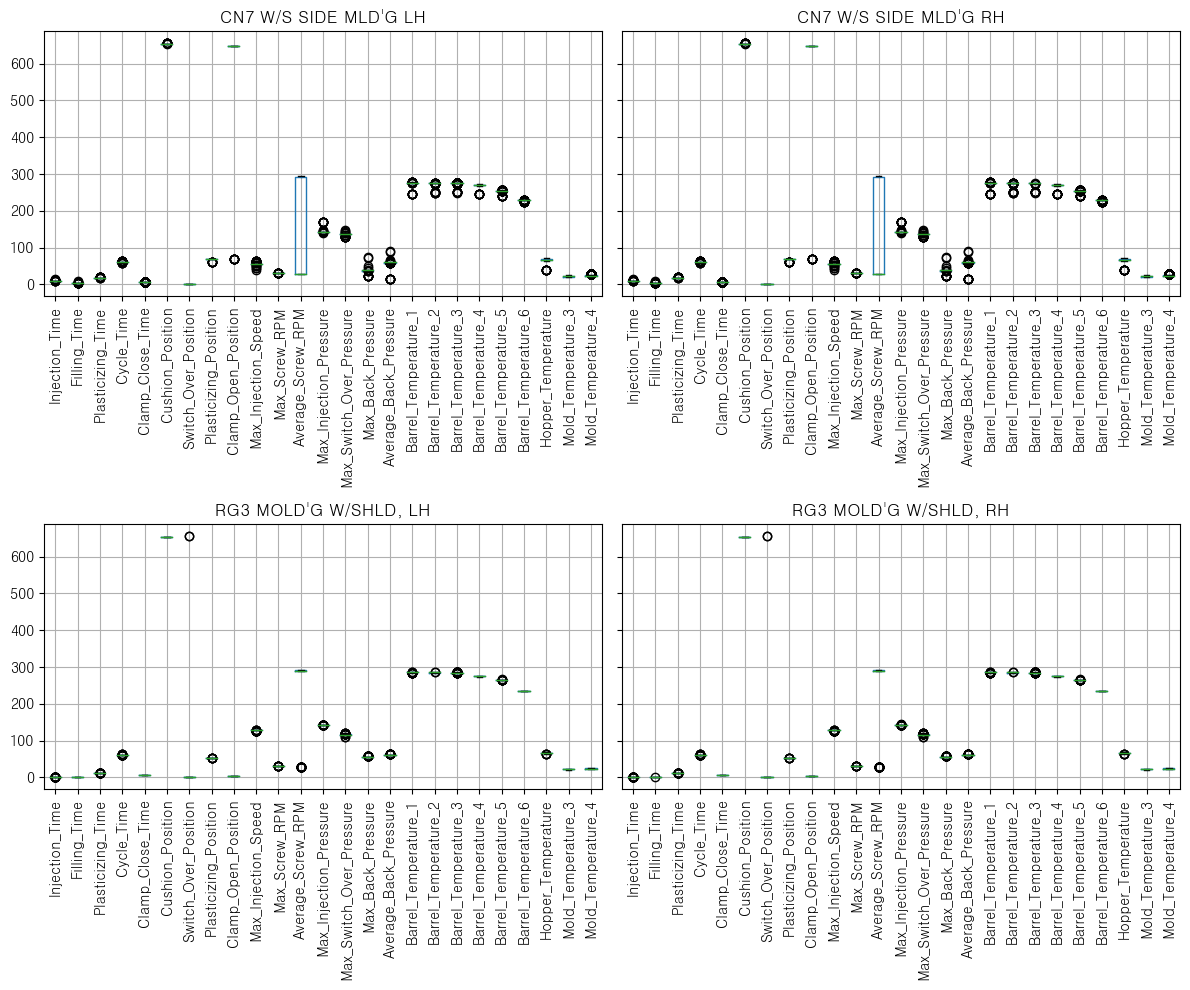

In [31]:
df.groupby("PART_NAME")[numeric_features].boxplot(
    figsize=(12, 10),
    rot=90
)
plt.tight_layout()
plt.show();

## 2차 EDA 결론

- CN7 제품과 RG3 제품은 완전히 다른 공정 조건을 가짐 --> 별도로 모델 생성하는 것이 적당하다 판단됨
- 각 제품 별 LH와 RH간 공정 조건의 차이는 미미함 --> LH와 RH를 Feature로 포함시켜야 하는지 추가 분석 필요함
- Categorical Feature의 경우 양품/불량품에 큰 영향이 없어 보임 --> 향후 유효 Feature에서 제외

# 4. 제품별로 Data 분리 후 추가 분석을 위한 CSV 파일 생성

In [32]:
df_CN7 = df.loc[df["PART_NAME"].str.contains("CN7")]
df_RG3 = df.loc[df["PART_NAME"].str.contains("RG3")]

In [33]:
df_CN7.to_csv("data/processed/labeled_data_CN7.csv", index=True)
df_RG3.to_csv("data/processed/labeled_data_RG3.csv", index=True)